In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("spam.csv",encoding='latin-1')[['v1', 'v2']]

In [124]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Data Preprocessing

In [6]:
# renaming the columns
df.columns = ["label", "text"]

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Checking null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
# Checking duplicate values
df.duplicated().sum()

403

In [11]:
# removing duplicate values
df = df.drop_duplicates(keep = "first")


In [12]:
df.duplicated().sum()

0

## EDA

In [13]:
df.label.value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

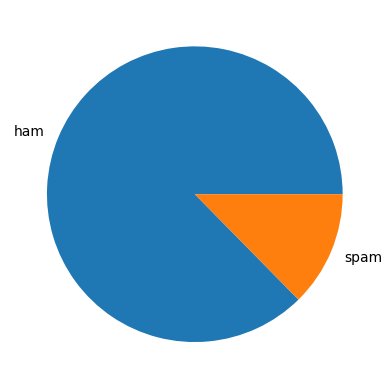

In [16]:
plt.pie(df.label.value_counts(), labels = ["ham", "spam"])
plt.show()

### Feature Engineering

In [17]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 20.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
#Natural Language Toolkit
import nltk

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [20]:
# Number of Characters
df["num_characters"] = df["text"].apply(len)
df

,label,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [27]:
# Number of Words
df["num_words"] = df.text.apply(lambda x : len(nltk.word_tokenize(x)))

In [29]:
df.head()

,label,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# Number of Sentences
df["num_sentences"] = df.text.apply(lambda x : len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
df["label"] = encoder.fit_transform(df.label)

In [35]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[df.label == 0].describe().drop("label", axis = 1)

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
df[df.label == 1].describe().drop("label",axis = 1)

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Text Preprocessing
1. Lowercase
2. Tokenize
3. Remove Punctuation and stop words
4. Remove Special Characters
5. Stemming

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
from nltk.corpus import stopwords
from string import punctuation
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    res = []
    for val in text:
        if val.isalnum() and val not in punctuation and val not in stopwords.words("english"):
            res.append(ps.stem(val))
    return " ".join(res)
transform_text("loving dancing walking")

'love danc walk'

In [58]:
df["transformed_text"] = df["text"].apply(transform_text)

In [59]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### WordCloud

In [61]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from wordcloud import WordCloud

In [69]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "black")

In [70]:
spam_wc = wc.generate(df[df.label==1]["transformed_text"].str.cat(sep = " "))

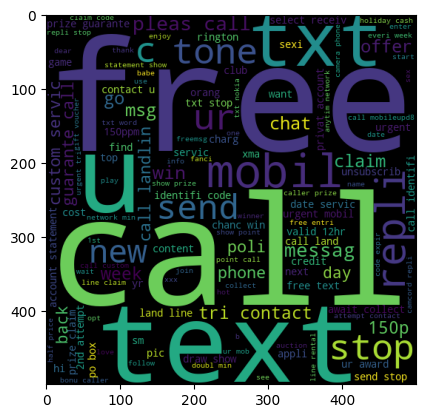

In [71]:
plt.imshow(spam_wc)

In [72]:
ham_wc = wc.generate(df[df.label == 0].transformed_text.str.cat(sep = " "))

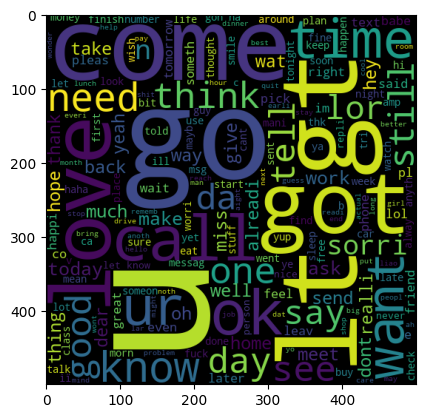

In [73]:
plt.imshow(ham_wc)

In [85]:
# Most common Words
words_spam = []
for msg in df[df.label == 1].transformed_text.tolist():
    for word in msg.split():
        words_spam.append(word)

In [90]:
from collections import Counter
spam_word = Counter(words_spam)
print(spam_word.most_common(30))

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


In [91]:
words_ham = []
for msg in df[df.label == 0].transformed_text.tolist():
    for word in msg.split():
        words_ham.append(word)

In [92]:
ham_words = Counter(words_ham)
print(ham_words.most_common(30))

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133), ('make', 129)]


## Model Building

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [105]:
X = cv.fit_transform(df.transformed_text).toarray()
X.shape

(5169, 6708)

In [97]:
y = df.label
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [102]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [103]:
from sklearn.metrics import precision_score, accuracy_score

### Gaussian

In [110]:
gnb.fit(X_train,y_train)

GaussianNB()

In [111]:
print("The score value of the gnb on training dataset is :",gnb.score(X_train,y_train))
print("the score value of the gnb on testing dataset is :",gnb.score(X_test,y_test))
y_pred_gnb = gnb.predict(X_train)
print("The accuracy score of the gnb is :", accuracy_score(y_train,y_pred_gnb))
print("The precision score of the gnb is :", precision_score(y_train,y_pred_gnb))

The score value of the gnb on training dataset is : 0.9262394195888755
the score value of the gnb on testing dataset is : 0.8684719535783365
The accuracy score of the gnb is : 0.9262394195888755
The precision score of the gnb is : 0.6248462484624846


### Multinomial

In [112]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [114]:
print("The score value of the mnb on training dataset is :",mnb.score(X_train,y_train))
print("the score value of the mnb on testing dataset is :",mnb.score(X_test,y_test))
y_pred_mnb = mnb.predict(X_train)
print("The accuracy score of the mnb is :", accuracy_score(y_train,y_pred_mnb))
print("The precision score of the mnb is :", precision_score(y_train,y_pred_mnb))

The score value of the mnb on training dataset is : 0.9915356711003628
the score value of the mnb on testing dataset is : 0.9738878143133463
The accuracy score of the mnb is : 0.9915356711003628
The precision score of the mnb is : 0.9739478957915831


### Bernoulli

In [115]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [116]:
print("The score value of the bnb on training dataset is :",bnb.score(X_train,y_train))
print("the score value of the bnb on testing dataset is :",bnb.score(X_test,y_test))
y_pred_bnb = bnb.predict(X_train)
print("The accuracy score of the bnb is :", accuracy_score(y_train,y_pred_bnb))
print("The precision score of the bnb is :", precision_score(y_train,y_pred_bnb))

The score value of the bnb on training dataset is : 0.9775090689238211
the score value of the bnb on testing dataset is : 0.9661508704061895
The accuracy score of the bnb is : 0.9775090689238211
The precision score of the bnb is : 0.9928741092636579


### Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth = 5)

In [119]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [120]:
print("The score value of the dct on training dataset is :",dct.score(X_train,y_train))
print("the score value of the dct on testing dataset is :",dct.score(X_test,y_test))
y_pred_dct = dct.predict(X_train)
print("The accuracy score of the dct is :", accuracy_score(y_train,y_pred_dct))
print("The precision score of the dct is :", precision_score(y_train,y_pred_dct))

The score value of the dct on training dataset is : 0.9419588875453446
the score value of the dct on testing dataset is : 0.9245647969052224
The accuracy score of the dct is : 0.9419588875453446
The precision score of the dct is : 0.9820143884892086


### Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 5, n_estimators = 5)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

In [123]:
print("The score value of the rfc on training dataset is :",rfc.score(X_train,y_train))
print("the score value of the rfc on testing dataset is :",rfc.score(X_test,y_test))
y_pred_rfc = rfc.predict(X_train)
print("The accuracy score of the rfc is :", accuracy_score(y_train,y_pred_rfc))
print("The precision score of the rfc is :", precision_score(y_train,y_pred_rfc))

The score value of the rfc on training dataset is : 0.8865779927448609
the score value of the rfc on testing dataset is : 0.8713733075435203
The accuracy score of the rfc is : 0.8865779927448609
The precision score of the rfc is : 0.975609756097561


### LogisticRegression

In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [126]:
lr.fit(X_train,y_train)

LogisticRegression()

In [127]:
print("The score value of the lr on training dataset is :",lr.score(X_train,y_train))
print("the score value of the lr on testing dataset is :",lr.score(X_test,y_test))
y_pred_lr = lr.predict(X_train)
print("The accuracy score of the lr is :", accuracy_score(y_train,y_pred_lr))
print("The precision score of the lr is :", precision_score(y_train,y_pred_lr))

The score value of the lr on training dataset is : 0.9944377267230955
the score value of the lr on testing dataset is : 0.97678916827853
The accuracy score of the lr is : 0.9944377267230955
The precision score of the lr is : 1.0


## Exporting the models

In [128]:
import pickle
pickle.dump(lr,open("logistic_model.pkl","wb"))
pickle.dump(bnb,open("bernoulli.pkl","wb"))

In [129]:
pickle.dump(cv,open("countvector.pkl","wb"))